# <i><b>Trabajo Practico Numero 1º<b><i> 

#### <b><i>Integrantes:<i><b>
#### <b><i>-Agustin Galli.<i><b>
#### <b><i>-Ana Affranchino.<i><b>
#### <b><i>-Fernando Castro Saia.<i><b>
#### <b><i>-Martin Sciandro.<i><b>
#### <b><i>-Tobias Canavesi.<i><b>

------------------------------------------------------------------------------------------------------

##### <i>Importacion de librerias y del DataFrame:<i>

In [2]:
#Importacion de librerias para Dataframes & Arrays:
import pandas as pd
import numpy as np
#Importacion de librerias de visualizacion:
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import re

In [3]:
data_location = "properatti.csv"
data = pd.read_csv(data_location, sep = ",", encoding = "latin1")
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
data.shape

(121220, 26)

In [5]:
#Descripcion del Dataset:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333300,4.000000e+06,3150.000000,32.000000,1.000150e+07


### <i> Limpieza de Datos: <i>

In [6]:
#Valores nulos del Dataset:
is_null = data.isnull()
cantidad_nulls = is_null.sum()
print(cantidad_nulls)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64


In [7]:
#Calculo el %:
cantidad_total_registros = data.shape[0]
porcentaje_nulls = (cantidad_nulls/cantidad_total_registros) * 100
print(porcentaje_nulls)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [8]:
#Eliminamos columnas innecesarias:
data_filt = data.drop(columns = ['properati_url','lat-lon','image_thumbnail'])
data_filt.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,-38.002626,-57.549447,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [9]:
data_filt.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'description', 'title'],
      dtype='object')

In [10]:
#Eliminamos filas duplicadas:
data_filt_2 = data_filt.drop_duplicates(subset = ['description','lat','lon'], keep = 'first')
data_filt_2.head(5)
data_filt_2.duplicated().sum()

0

In [11]:
#Filtramos y limpiamos moneda dejando unicamente USD y ARS:
data_filt_2['currency'].unique()
data_filt_2['currency'].value_counts()

USD    80142
ARS    10009
PEN        2
UYU        1
Name: currency, dtype: int64

In [12]:
mask_UYU = data_filt_2['currency'] == 'UYU'
data_filt_2[mask_UYU]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,...,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Casa con CalefacciÃ³n central, Mendoza, San Ro...",Casa - San Vicente


In [13]:
mask_PEN = data_filt_2['currency'] == 'PEN'
data_filt_2[mask_PEN]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: DÃºplex ...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [14]:
data_filt_3 = data_filt_2.drop(index = [107390, 50387, 50388])
data_filt_3['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

In [18]:
#Eliminacion de duplicados con igual latitud, longitud y descripcion:
data_filt_4 = data_filt_3.drop_duplicates(subset = ['description', 'lat', 'lon'], keep = 'first')
data_filt_4.describe()
data_filt_4.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,-38.002626,-57.549447,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [49]:
#Analisis de outliers sobre la columna de precios 'price_aprox_usd':
price_aprox_usd_describe = data_filt_4['price_aprox_usd'].describe()
print(price_aprox_usd_describe)

count    9.015200e+04
mean     2.453367e+05
std      3.946684e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      2.750000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64


In [50]:
q1 = price_aprox_usd_describe.quantile(0.25)
print(q1)
q2 = price_aprox_usd_describe.quantile(0.5)
print(q2)
q3 = price_aprox_usd_describe.quantile(0.75)
print(q3)

iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = price_aprox_usd_describe > up_threshold
outlier_mask_down = price_aprox_usd_describe < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = price_aprox_usd_describe[outlier_mask]


90114.0
197668.34570791555
304917.08987117035
627121.7246779259
-232090.63480675552


In [51]:
price_aprox_usd_describe_filt = price_aprox_usd_describe[not_outliers]
price_aprox_usd_describe_filt.describe()

count         7.000000
mean     177879.578700
std      134670.943171
min           0.000000
25%       90076.000000
50%      150000.000000
75%      260168.345708
max      394668.359485
Name: price_aprox_usd, dtype: float64

<AxesSubplot:>

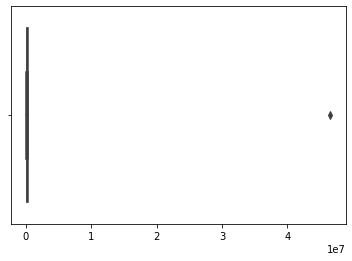

In [52]:
sns.boxplot(x= price_aprox_usd_describe.values)

<AxesSubplot:>

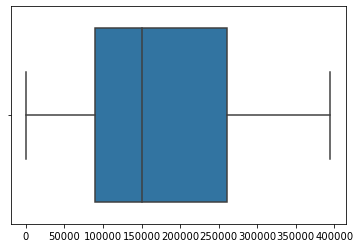

In [53]:
sns.boxplot(x= price_aprox_usd_describe_filt.values)

In [54]:
#Imputacion precio 'price_usd_per_m2':
data_filt_4['price_usd_per_m2_clean'] = data_filt_4['price_usd_per_m2']
mask_price_null = data_filt_4['price_usd_per_m2'].isnull()
#Sumamos cantidad de nulos
(data_filt_4.loc[mask_price_null, 'price_usd_per_m2_clean']).isnull().sum()
#Imputamos
data_filt_4.loc[mask_price_null, 'price_usd_per_m2_clean'] = (data_filt_4.loc[mask_price_null , 'price'] / data_filt_4.loc[mask_price_null , 'surface_covered_in_m2'])
#Calculo de %
data_filt_4.loc[:, 'price_usd_per_m2_clean'].isnull().sum() / data_filt_4.shape[0] * 100

22.25533515088841

In [55]:
#Analisis de outliers sobre la columna 'price_usd_per_m2_clean'
price_usd_per_m2_clean_describe = data_filt_4['price_usd_per_m2_clean'].describe()
price_usd_per_m2_clean_describe

q1_price_clean = price_usd_per_m2_clean_describe.quantile(0.25)
print(q1)
q2_price_clean = price_usd_per_m2_clean_describe.quantile(0.5)
print(q2)
q3_price_clean = price_usd_per_m2_clean_describe.quantile(0.75)
print(q3)


iqr_price_clean = (q3_price_clean - q1_price_clean) * 1.5

up_threshold_price_clean = q3_price_clean + iqr_price_clean
low_threshold_price_clean = q1_price_clean - iqr_price_clean

print(up_threshold_price_clean)
print(low_threshold_price_clean)

outlier_mask_up_2 = price_usd_per_m2_clean_describe > up_threshold_price_clean
outlier_mask_down_2 = price_usd_per_m2_clean_describe < low_threshold_price_clean
outlier_mask_2 = np.logical_or(outlier_mask_up_2, outlier_mask_down_2)
not_outliers_2 = np.logical_not(outlier_mask_2)

outliers_2 = price_usd_per_m2_clean_describe[outlier_mask_2]

90114.0
197668.34570791555
304917.08987117035
98338.5250492992
-56354.226140779516


In [56]:
price_usd_per_m2_clean_filtered = price_usd_per_m2_clean_describe[not_outliers]
price_usd_per_m2_clean_filtered.describe()

count        7.000000
mean     16857.868798
std      30441.159581
min          0.600000
25%       1511.111111
50%       2520.498447
75%      14882.380457
max      82697.000000
Name: price_usd_per_m2_clean, dtype: float64

<AxesSubplot:>

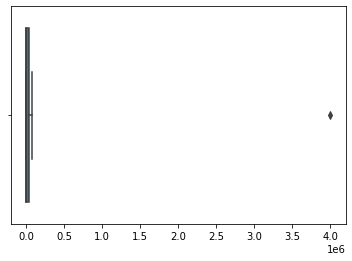

In [57]:
sns.boxplot(x = price_usd_per_m2_clean_describe.values)

<AxesSubplot:>

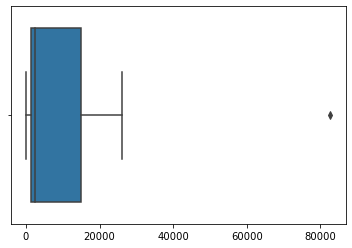

In [58]:
sns.boxplot(x = price_usd_per_m2_clean_filtered.values)

### <i> Limpieza con REGEX: <i>

In [62]:
data_filt_4['description'][1]

'Venta de departamento en dÃ©cimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcÃ³n con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. CalefacciÃ³n por radiadorBaÃ±o completo.BalcÃ³n corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de PÃ¡ginas Web para Inmobiliarias).'

In [91]:
#REGEX Piletas:
pileta_pattern = "pileta|picina|pisina|piscina"
pileta_regex = re.compile(pileta_pattern, re.I)
pileta_matches = data_filt_4['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_mask = pileta_matches.notnull()
pilteta_mask_sum = pileta_matches.notnull().sum
pileta_description = pileta_matches.loc[pileta_mask]
print(pileta_description)

7         <re.Match object; span=(102, 108), match='PILE...
8         <re.Match object; span=(102, 108), match='PILE...
13        <re.Match object; span=(101, 108), match='Pisc...
14        <re.Match object; span=(76, 83), match='Piscina'>
18        <re.Match object; span=(421, 428), match='Pisc...
                                ...                        
121155    <re.Match object; span=(263, 269), match='pile...
121211    <re.Match object; span=(458, 464), match='pile...
121212    <re.Match object; span=(601, 607), match='pile...
121213    <re.Match object; span=(269, 275), match='pile...
121215    <re.Match object; span=(292, 298), match='pile...
Name: description, Length: 28254, dtype: object


In [92]:
pileta_description.iloc[2].string

' Torre I Mondrian. 3 ambientes con terraza y dos baÃ±os al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de ReuniÃ³n para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un SalÃ³n de Usos MÃºltiples con cocina y una amplia expansiÃ³n. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.AsÃ\xad destaca la Excelente RelaciÃ³n de espacios de uso comÃºn sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.'

In [93]:
description_to_replace = [x.string for x in pileta_description]
print(len(description_to_replace))
description_to_replace_unique = list(set(description_to_replace))
print(len(description_to_replace_unique))

28254
27812


In [94]:
#Creacion de nuevas columnas:
data_filt_4['pileta'] = ''
data_filt_4['cochera'] = ''

data_filt_4.loc[pileta_mask, 'pileta'] = 1
data_filt_4[['description','pileta']].head(5)


,description,pileta
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",
1,Venta de departamento en dÃ©cimo piso al frent...,
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,
3,PH 3 ambientes con patio. Hay 3 deptos en lote...,
4,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,


In [95]:
#REGEX Cochera:
cochera_pattern = "cochera|garage"
cochera_regex = re.compile(cochera_pattern, re.I)
cochera_matches = data_filt_4['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
cochera_mask = cochera_matches.notnull()
cochera_mask_sum = cochera_mask.notnull().sum
cochera_description = cochera_matches.loc[cochera_mask]
print(cochera_description)

1         <re.Match object; span=(338, 345), match='coch...
10        <re.Match object; span=(75, 82), match='cochera'>
15        <re.Match object; span=(141, 148), match='coch...
17        <re.Match object; span=(385, 392), match='Coch...
23        <re.Match object; span=(422, 429), match='coch...
                                ...                        
121210    <re.Match object; span=(213, 220), match='Coch...
121211    <re.Match object; span=(334, 341), match='coch...
121214    <re.Match object; span=(180, 187), match='Coch...
121215    <re.Match object; span=(206, 213), match='Coch...
121217    <re.Match object; span=(564, 571), match='COCH...
Name: description, Length: 43763, dtype: object


In [96]:
cochera_description.iloc[0].string

'Venta de departamento en dÃ©cimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcÃ³n con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. CalefacciÃ³n por radiadorBaÃ±o completo.BalcÃ³n corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de PÃ¡ginas Web para Inmobiliarias).'

In [97]:
description_to_replace_cochera= [x.string for x in cochera_description]
print(len(description_to_replace_cochera))
description_to_replace_unique_cochera = list(set(description_to_replace_cochera))
print(len(description_to_replace_unique_cochera))

43763
43191


In [99]:
data_filt_4.loc[cochera_mask, 'cochera'] = 1
data_filt_4[['description','pileta','cochera']].head(5)

,description,pileta,cochera
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",,
1,Venta de departamento en dÃ©cimo piso al frent...,,1
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,,
3,PH 3 ambientes con patio. Hay 3 deptos en lote...,,
4,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,,
